# K-Nearest Neighbors Algorithm for Glass Dataset

###  Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

### Content
Attribute Information:

1. Id number: 1 to 214 (removed from CSV file)
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute):

    - 1 buildingwindowsfloatprocessed
    - 2 buildingwindowsnonfloatprocessed
    - 3 vehiclewindowsfloatprocessed
    - 4 vehiclewindowsnonfloatprocessed (none in this database)
    - 5 containers
    - 6 tableware
    - 7 headlamps

Dataset Source : https://www.kaggle.com/uciml/glass



## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('glass.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.shape
dataset.isnull().sum().sum() # Missing data control 

0

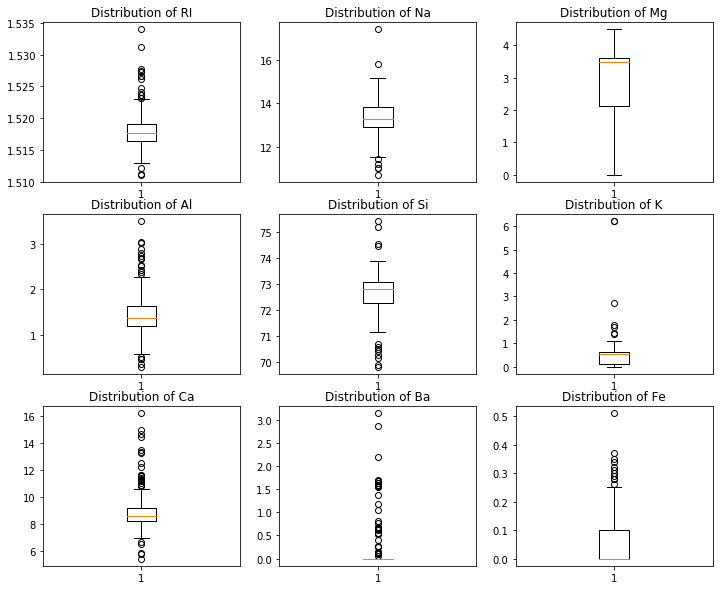

In [3]:

fig = plt.figure(figsize = (12,10))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,3,7)
ax8 = fig.add_subplot(3,3,8)
ax9 = fig.add_subplot(3,3,9)

# Boxplot for RI
ax1.boxplot(dataset['RI'])
ax1.set_title('Distribution of RI')

# Boxplot for Na
ax2.boxplot(dataset['Na'])
ax2.set_title('Distribution of Na')

# Boxplot for Mg
ax3.boxplot(dataset['Mg'])
ax3.set_title('Distribution of Mg')


# Boxplot for AL
ax4.boxplot(dataset['Al'])
ax4.set_title('Distribution of Al')



# Boxplot for Si
ax5.boxplot(dataset['Si'])
ax5.set_title('Distribution of Si')


# Boxplot for K
ax6.boxplot(dataset['K'])
ax6.set_title('Distribution of K')

# Boxplot for Ca
ax7.boxplot(dataset['Ca'])
ax7.set_title('Distribution of Ca')


# Boxplot for Ba
ax8.boxplot(dataset['Ba'])
ax8.set_title('Distribution of Ba')


# Boxplot for Fe
ax9.boxplot(dataset['Fe'])
ax9.set_title('Distribution of Fe');

## Splitting the dataset into the Training set and Test set

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Train Set

In [5]:
print("X_train Data:\n",X_train)
print("\ny_train Data:\n",y_train)

X_train Data:
 [[ 1.51674 12.79     3.52    ...  7.9      0.       0.     ]
 [ 1.51808 13.43     2.87    ...  9.03     0.       0.     ]
 [ 1.52152 13.05     3.65    ...  9.85     0.       0.17   ]
 ...
 [ 1.51708 13.72     3.68    ...  7.88     0.       0.     ]
 [ 1.52667 13.99     3.7     ...  9.82     0.       0.1    ]
 [ 1.51321 13.       0.      ...  6.93     0.       0.     ]]

y_train Data:
 [2 1 1 1 1 3 3 1 1 2 1 2 3 1 1 1 1 2 2 1 3 2 1 7 1 2 6 3 2 7 3 2 2 1 1 2 7
 1 1 3 7 7 2 1 1 1 2 7 1 1 2 2 7 7 7 3 2 1 2 2 5 7 1 2 1 2 2 2 1 3 1 1 1 1
 2 7 1 2 2 2 5 7 1 1 2 2 7 5 6 6 5 2 6 1 2 2 1 1 1 1 2 5 1 2 2 7 1 1 2 1 7
 2 1 1 2 5 3 1 6 2 7 1 5 2 6 3 1 6 2 2 5 2 2 3 7 2 2 1 5 2 7 5 7 1 7 1 2 2
 2 2 1 1 1 2 7 1 7 2 1 5]


## Test Set

In [6]:
print("X_test Data:\n",X_test)
print("\ny_test Data:\n",y_test)

X_test Data:
 [[1.51727e+00 1.47000e+01 0.00000e+00 2.34000e+00 7.32800e+01 0.00000e+00
  8.95000e+00 6.60000e-01 0.00000e+00]
 [1.51797e+00 1.27400e+01 3.48000e+00 1.35000e+00 7.29600e+01 6.40000e-01
  8.68000e+00 0.00000e+00 0.00000e+00]
 [1.51640e+00 1.25500e+01 3.48000e+00 1.87000e+00 7.32300e+01 6.30000e-01
  8.08000e+00 0.00000e+00 9.00000e-02]
 [1.51905e+00 1.40000e+01 2.39000e+00 1.56000e+00 7.23700e+01 0.00000e+00
  9.57000e+00 0.00000e+00 0.00000e+00]
 [1.52369e+00 1.34400e+01 0.00000e+00 1.58000e+00 7.22200e+01 3.20000e-01
  1.22400e+01 0.00000e+00 0.00000e+00]
 [1.51590e+00 1.30200e+01 3.58000e+00 1.51000e+00 7.31200e+01 6.90000e-01
  7.96000e+00 0.00000e+00 0.00000e+00]
 [1.51841e+00 1.30200e+01 3.62000e+00 1.06000e+00 7.23400e+01 6.40000e-01
  9.13000e+00 0.00000e+00 1.50000e-01]
 [1.51711e+00 1.28900e+01 3.62000e+00 1.57000e+00 7.29600e+01 6.10000e-01
  8.11000e+00 0.00000e+00 0.00000e+00]
 [1.51596e+00 1.27900e+01 3.61000e+00 1.62000e+00 7.29700e+01 6.40000e-01
  8.0700

## Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
print(X_train)

[[-0.57016436 -0.8021311   0.59394972 ... -0.73204433 -0.36042422
  -0.5574741 ]
 [-0.12738242 -0.01596892  0.14178098 ...  0.03745343 -0.36042422
  -0.5574741 ]
 [ 1.00931153 -0.48275272  0.68438347 ...  0.59585004 -0.36042422
   1.35466909]
 ...
 [-0.4578167   0.34026082  0.70525279 ... -0.74566376 -0.36042422
  -0.5574741 ]
 [ 2.7110481   0.67192299  0.71916568 ...  0.57542089 -0.36042422
   0.56731601]
 [-1.73659739 -0.54417164 -1.85471789 ... -1.39258666 -0.36042422
  -0.5574741 ]]


In [9]:
print(X_test)

[[-3.95034190e-01  1.54407167e+00 -1.85471789e+00  1.75197496e+00
   8.54487173e-01 -6.88607851e-01 -1.70242868e-02  1.01064199e+00
  -5.57474100e-01]
 [-1.63730189e-01 -8.63550025e-01  5.66123950e-01 -1.61246920e-01
   4.37862630e-01  1.79249921e-01 -2.00886585e-01 -3.60424223e-01
  -5.57474100e-01]
 [-6.82512019e-01 -1.09694192e+00  5.66123950e-01  8.43677703e-01
   7.89389588e-01  1.65689643e-01 -6.09469468e-01 -3.60424223e-01
   4.54837002e-01]
 [ 1.93138841e-01  6.84206777e-01 -1.92128234e-01  2.44588024e-01
  -3.30288871e-01 -6.88607851e-01  4.05178026e-01 -3.60424223e-01
  -5.57474100e-01]
 [ 1.72635393e+00 -3.68513524e-03 -1.85471789e+00  2.83238971e-01
  -5.25581625e-01 -2.54678965e-01  2.22337186e+00 -3.60424223e-01
  -5.57474100e-01]
 [-8.47729162e-01 -5.19604069e-01  6.35688371e-01  1.47960657e-01
   6.46174901e-01  2.47051309e-01 -6.91186045e-01 -3.60424223e-01
  -5.57474100e-01]
 [-1.83391029e-02 -5.19604069e-01  6.63514139e-01 -7.21685652e-01
  -3.69347422e-01  1.7924992

## Training the K-NN model on the Training set

In [10]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2) # if p=2, it will be euclidian distance
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

## Predicting a new result

In [11]:
print(classifier.predict(sc.transform([[1.5161,13.42,3.4,1.22,72.69,0.59,8.32,0,0]])))

[1]


## Predicting the Test set results

In [12]:
y_pred = classifier.predict(X_test)
print("  p t")
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

  p t
[[7 7]
 [1 1]
 [2 2]
 [1 6]
 [5 5]
 [2 2]
 [1 2]
 [2 2]
 [2 1]
 [1 2]
 [1 1]
 [2 2]
 [2 3]
 [2 2]
 [2 2]
 [7 7]
 [1 2]
 [1 1]
 [1 3]
 [2 3]
 [2 5]
 [1 2]
 [7 7]
 [7 7]
 [1 2]
 [1 1]
 [7 7]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [1 2]
 [1 2]
 [1 3]
 [1 1]
 [1 3]
 [1 2]
 [7 7]
 [2 2]
 [2 6]
 [2 2]
 [1 1]
 [1 2]
 [2 2]
 [1 1]
 [2 2]
 [2 1]
 [2 2]
 [1 1]
 [6 2]
 [7 7]
 [2 1]]


## Making the Confusion Matrix

[[11  3  0  0  0  0]
 [ 9 14  0  0  1  0]
 [ 3  2  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 1  1  0  0  0  0]
 [ 0  0  0  0  0  7]]


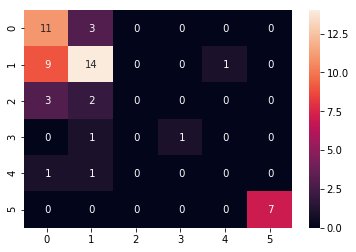

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
print(cm)
#heatmap for confusion matrix
accuracy_score(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6111111111111112

## Visualising the Test set results

/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:193: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(0, a.mean())
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by 

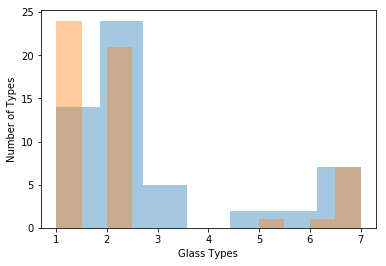

In [15]:
sns.distplot(y_test, kde = False, axlabel='Glass Types') # Blue : Test Datas Classes 
sns.distplot(y_pred, kde = False, axlabel='Glass Types')# Orange : Predict Datas Classes
sns.distplot([],axlabel="Number of Types", vertical=' ') # For named Y axis

## Selecting Best Parameters

In [19]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors' : [5,6,7] , 'metric' : ['minkowski','euclidean'],
              'algorithm' :['auto','ball_tree', 'kd_tree', 'brute'],'p' : [0,1,2,3,4]}
grid = GridSearchCV(KNeighborsClassifier(), parameters,n_jobs=-1)

In [29]:
gridSearch= grid.fit(X_train, y_train)
print('Best parameters:{}'.format(gridSearch.best_params_))
print("Best estimator:\n{}".format(gridSearch.best_estimator_))
print("Test set score: {:.2f}".format(gridSearch.score(X_test, y_test)))
y_train

Best parameters:{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 6, 'p': 2}
Best estimator:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
Test set score: 0.69


array([2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 2, 2, 1, 3, 2,
       1, 7, 1, 2, 6, 3, 2, 7, 3, 2, 2, 1, 1, 2, 7, 1, 1, 3, 7, 7, 2, 1,
       1, 1, 2, 7, 1, 1, 2, 2, 7, 7, 7, 3, 2, 1, 2, 2, 5, 7, 1, 2, 1, 2,
       2, 2, 1, 3, 1, 1, 1, 1, 2, 7, 1, 2, 2, 2, 5, 7, 1, 1, 2, 2, 7, 5,
       6, 6, 5, 2, 6, 1, 2, 2, 1, 1, 1, 1, 2, 5, 1, 2, 2, 7, 1, 1, 2, 1,
       7, 2, 1, 1, 2, 5, 3, 1, 6, 2, 7, 1, 5, 2, 6, 3, 1, 6, 2, 2, 5, 2,
       2, 3, 7, 2, 2, 1, 5, 2, 7, 5, 7, 1, 7, 1, 2, 2, 2, 2, 1, 1, 1, 2,
       7, 1, 7, 2, 1, 5])

In [32]:
classifier2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)

[[13  1  0  0  0  0]
 [10 14  0  0  0  0]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  7]]


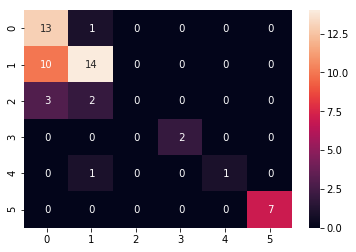

In [33]:
cm = confusion_matrix(y_test, y_pred2)
print(cm)
#heatmap for confusion matrix
accuracy_score(y_test, y_pred2)
sns.heatmap(cm,annot=True,fmt='2.0f')

/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:193: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(0, a.mean())
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/mertagcakoyun/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by 

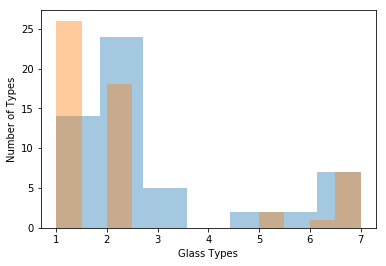

In [34]:
sns.distplot(y_test, kde = False, axlabel='Glass Types') # Blue : Test Datas Classes 
sns.distplot(y_pred2, kde = False, axlabel='Glass Types')# Orange : Predict Datas Classes
sns.distplot([],axlabel="Number of Types", vertical=' ') # For named Y axis

In [35]:
accuracy_score(y_test,y_pred2)

0.6851851851851852

## As a result
When we compare SVM and KNN algorithms, we obtained a more successful result in SVM algorithm. When we look at the structure of the data set, we thought that the KNN algorithm would be the most succesful result. However, this did not happen. For the KNN algorithm; Although we have 7 glass types, the selection of 6 neighbors has increased success. I think the reason of this situation is glass type 4 is not exist in dataset.

## References
    -https://www.kaggle.com/juxwzera/decision-tree-and-knn
    -https://seaborn.pydata.org/generated/seaborn.distplot.html (seaborn library is used for visualising data)

    -Some lecture codes from Introduction to Machine Learning course by Berna KIRAZ
    